In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic' #  Windows 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

In [25]:
# 비교 데이터
data = {
    "항목": [
        "총 매핑 성공 행 수", 
        "전체 성공률 (%)", 
        "데이터 처리 시간 (초)", 
        "평균 처리 속도 (행/초)"
    ],
    "반복 탐색 방식 (loop)": [158215, 99.15, 1113.26, 143.3],
    "벡터화 방식 (sjoin)": [158549, 99.36, 8.46, 18865.0]
}

df = pd.DataFrame(data)
labels = ["반복 탐색 방식 (loop)", "벡터화 방식 (sjoin)"]
colors = ["#ff9999", "#66b3ff"]

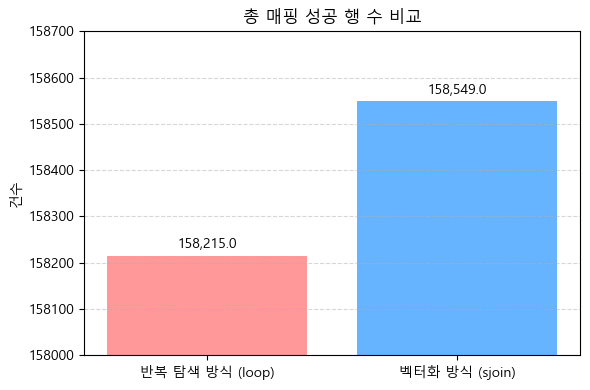

In [34]:
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, df.loc[0, labels], color=colors)

# y축 범위 조정 (중간부터 시작)
ax.set_ylim(158000, 158700)
ax.set_title("총 매핑 성공 행 수 비교")
ax.set_ylabel("건수")
ax.grid(True, axis="y", linestyle="--", alpha=0.5)

# 수치 표시
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 10, f"{height:,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


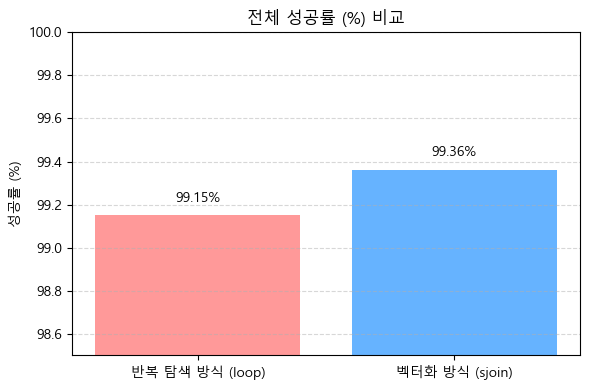

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, df.loc[1, labels], color=colors)

ax.set_ylim(98.5, 100)
ax.set_title("전체 성공률 (%) 비교")
ax.set_ylabel("성공률 (%)")
ax.grid(True, axis="y", linestyle="--", alpha=0.5)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.05, f"{height:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()


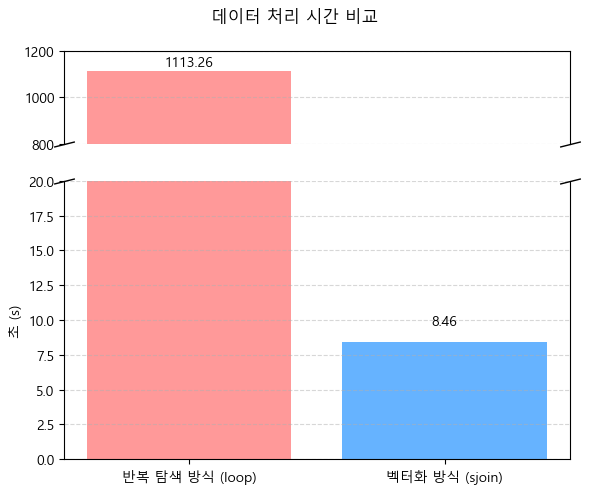

In [65]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 5), gridspec_kw={"height_ratios": [1, 3]})

y_vals = df.loc[2, labels]  # 데이터 처리 시간
bars1 = ax1.bar(labels, y_vals, color=colors)
bars2 = ax2.bar(labels, y_vals, color=colors)

# y축 범위 설정 (위는 큰값, 아래는 작은값)
ax1.set_ylim(800, 1200)
ax2.set_ylim(0, 20)

# 눈금선 및 스타일
ax1.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax1.tick_params(bottom=False)
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)
ax2.grid(True, axis='y', linestyle='--', alpha=0.5)

# 컷 마커 추가
kwargs = dict(marker=[(-1, -0.25), (1, 0.25)], markersize=15, linestyle="none", color='k', clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1.0, 1.0], transform=ax2.transAxes, **kwargs)

# 바 레이블
for ax in [ax1, ax2]:
    for bar in ax.patches:
        height = bar.get_height()
        if ax == ax1 and height > 100:  # 상단축은 큰값만
            ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f"{height:.2f}", ha="center", va="bottom")
        if ax == ax2 and height < 100:  # 하단축은 작은값만
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.2f}", ha="center", va="bottom")

# 라벨 및 제목
ax2.set_ylabel("초 (s)")
fig.suptitle("데이터 처리 시간 비교")

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.show()


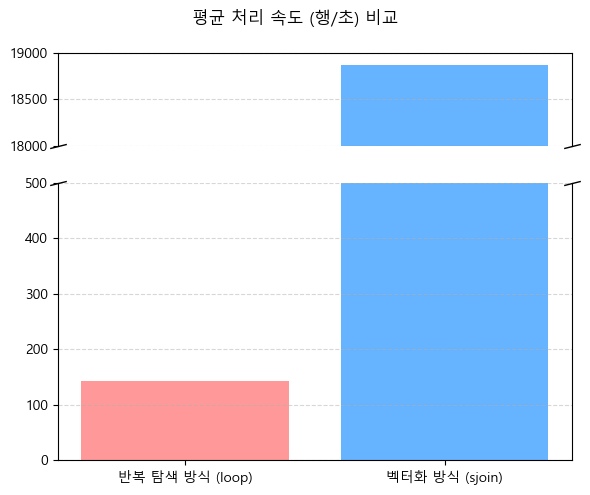

In [66]:
from matplotlib import gridspec

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 5), gridspec_kw={'height_ratios': [1, 3]})

# 값 추출
y_vals = df.loc[3, labels]

# 상단 축 (loop만 보임)
ax1.bar(labels, y_vals, color=colors)
ax1.set_ylim(18000, 19000)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

# 하단 축 (둘 다 보임)
ax2.bar(labels, y_vals, color=colors)
ax2.set_ylim(0, 500)
ax2.spines['top'].set_visible(False)
ax2.grid(True, axis='y', linestyle='--', alpha=0.5)

kwargs = dict(marker=[(-1, -0.25), (1, 0.25)], markersize=12,
              linestyle="none", color='k', clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

fig.suptitle("평균 처리 속도 (행/초) 비교")
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.show()
